# MANUAL NET ARCHITECTURE

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import os
import glob
import numpy as np

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential
from PIL import Image

from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation

from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

In [ ]:
AP = 'datasets/train/AP'
ATP = 'datasets/train/ATP'
IR20 = 'datasets/train/IR20'
KO50 = 'datasets/train/KO50'

In [ ]:
def plot_images(item_dir, n=6):
    all_item_dir = os.listdir(item_dir)
    item_files = [os.path.join(item_dir, file) for file in all_item_dir][:n]
    
    plt.figure(figsize=(80, 40))
    for idx, img_path in enumerate(item_files):
        plt.subplot(3, n, idx+1)
        img = plt.imread(img_path)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
    
    plt.tight_layout()
    
def image_details_print(data,path):
    print('======== Images in: ', path)
    for key,values in data.items():
        print(key,':\t', values)


def images_details(path):
    files=[f for f in glob.glob(path + "**/*.*", recursive=True)]
    data={}
    data['Images_count']=len(files)
    data['Min_width']=10**100
    data['Max_width']=0
    data['Min_height']=10**100
    data['Max_height']=0
    
    for f in files:
        img=Image.open(f)
        width,height=img.size
        data['Min_width']=min(width,data['Min_width'])
        data['Max_width']=max(width, data['Max_width'])
        data['Min_height']=min(height, data['Min_height'])
        data['Max_height']=max(height, data['Max_height'])
        
    image_details_print(data,path)


TRAINING DATA FOR ATP:

======== Images in:  datasets/train/ATP
Images_count :	 500
Min_width :	 1276
Max_width :	 1558
Min_height :	 1276
Max_height :	 1558



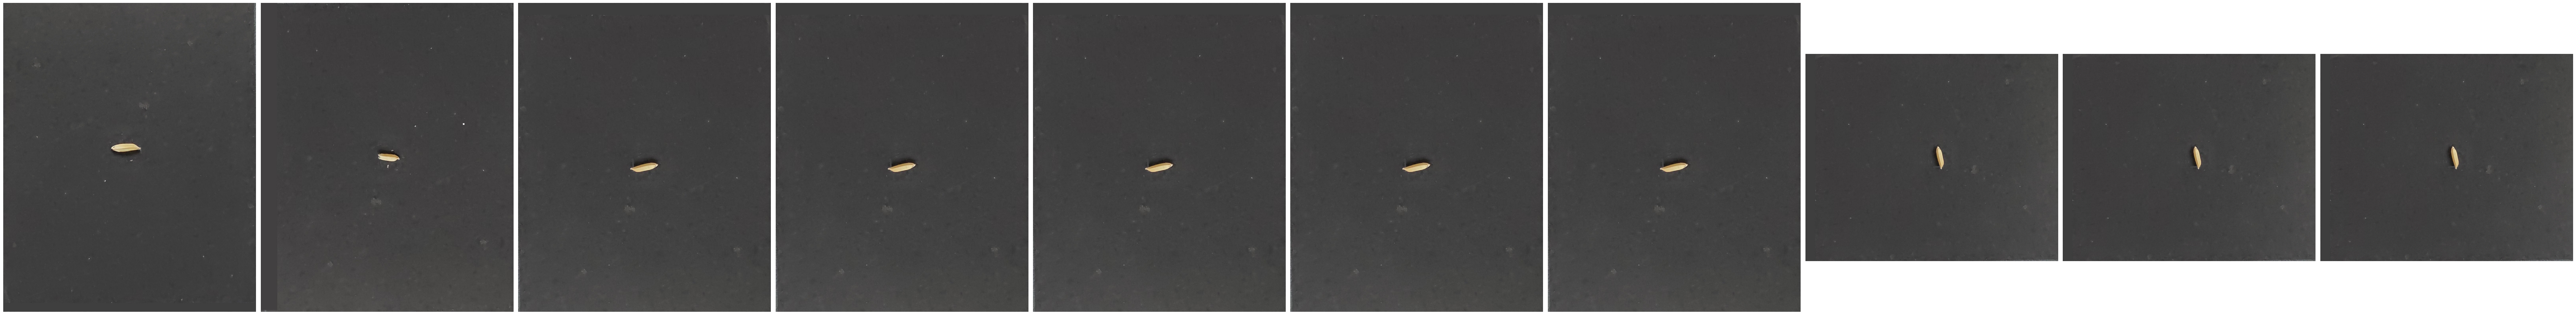

In [ ]:
print("")
print("TRAINING DATA FOR ATP:")
print("")
images_details(ATP)
print("")
plot_images(ATP, 10)


TRAINING DATA FOR IR20:

======== Images in:  datasets/train/IR20
Images_count :	 500
Min_width :	 1276
Max_width :	 1558
Min_height :	 1276
Max_height :	 1558



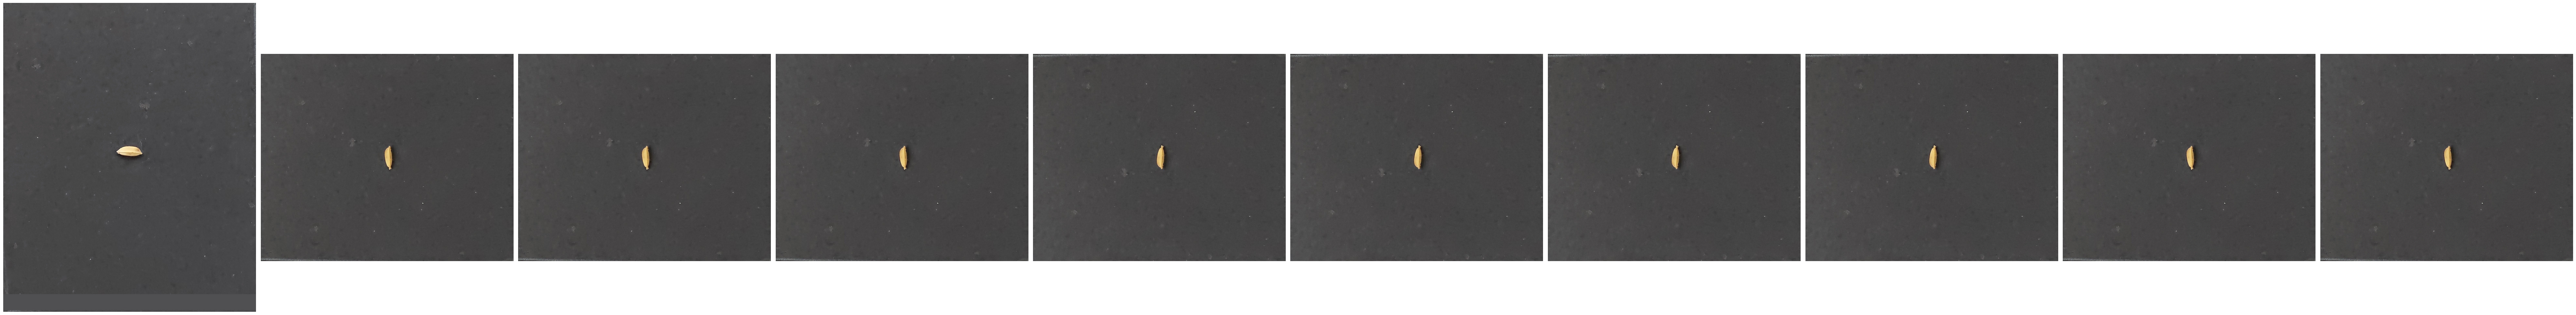

In [ ]:
print("")
print("TRAINING DATA FOR IR20:")
print("")
images_details(IR20)
print("")
plot_images(IR20, 10)


TRAINING DATA FOR KO50:

======== Images in:  datasets/train/KO50
Images_count :	 500
Min_width :	 1276
Max_width :	 1558
Min_height :	 1276
Max_height :	 1558



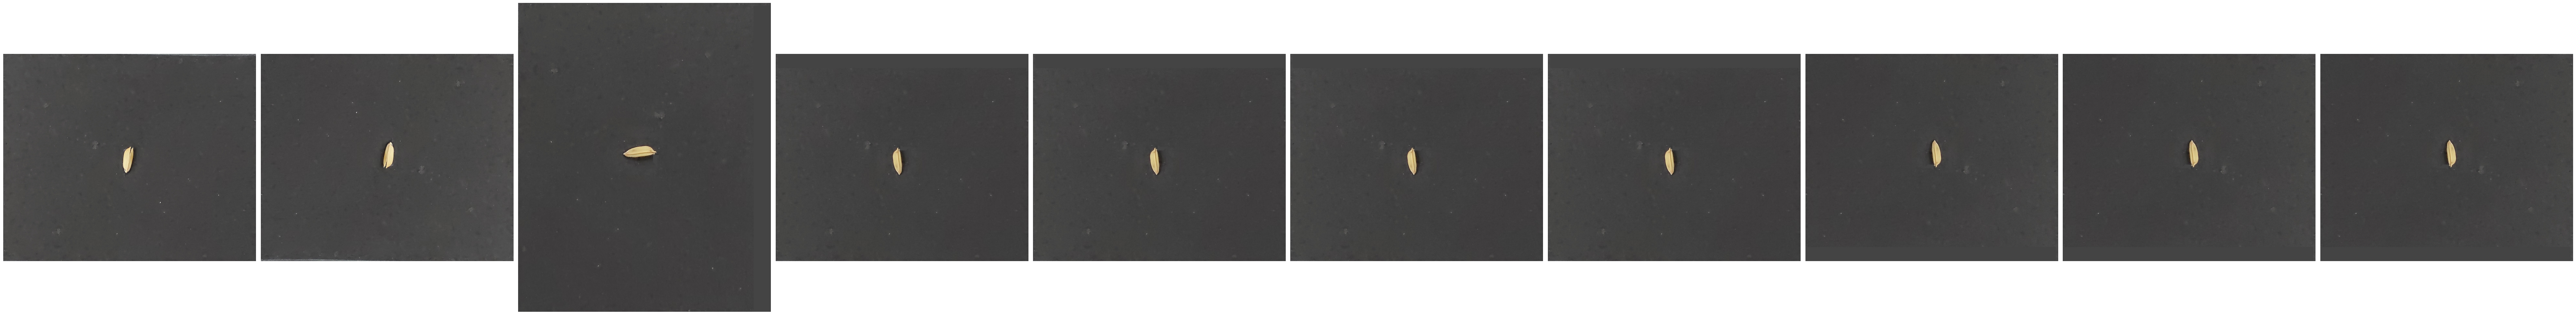

In [ ]:
print("")
print("TRAINING DATA FOR KO50:")
print("")
images_details(KO50)
print("")
plot_images(KO50, 10)

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
training_set=train_datagen.flow_from_directory('datasets/train',target_size=(224,224),batch_size=32,class_mode='categorical')

Found 1501 images belonging to 4 classes.


In [ ]:
test_datagen=ImageDataGenerator(rescale=1./255)
test_set=test_datagen.flow_from_directory('datasets/test',target_size=(224,224),batch_size=32,class_mode='categorical')

Found 2000 images belonging to 4 classes.


In [ ]:
Classifier=Sequential()
Classifier.add(Convolution2D(32,(3,3),input_shape=(224,224,3),activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))
Classifier.add(Flatten())
Classifier.add(Dense(38, activation='relu'))
Classifier.add(Dense(4, activation='softmax'))
Classifier.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model_path = "MANUAL.h5"

callbacks = [
    ModelCheckpoint(model_path, monitor='accuracy', verbose=1, save_best_only=True)
]

In [ ]:
epochs = 10
batch_size = 512

In [ ]:
#### Fitting the model
history = Classifier.fit(
           training_set, steps_per_epoch=training_set.samples // batch_size, 
           epochs=epochs, 
           validation_data=test_set,validation_steps=test_set.samples // batch_size,
           callbacks=callbacks)

Epoch 1/10


2/2 [==============================] - ETA: 0s - loss: 23.8675 - accuracy: 0.3594
Epoch 1: accuracy improved from -inf to 0.35938, saving model to MANUAL.h5
2/2 [==============================] - 4s 2s/step - loss: 23.8675 - accuracy: 0.3594 - val_loss: 91.3540 - val_accuracy: 0.2083
Epoch 2/10
2/2 [==============================] - ETA: 0s - loss: 41.9891 - accuracy: 0.3750
Epoch 2: accuracy improved from 0.35938 to 0.37500, saving model to MANUAL.h5
2/2 [==============================] - 3s 2s/step - loss: 41.9891 - accuracy: 0.3750 - val_loss: 28.5344 - val_accuracy: 0.2500
Epoch 3/10
2/2 [==============================] - ETA: 0s - loss: 14.7140 - accuracy: 0.2344
Epoch 3: accuracy did not improve from 0.37500
2/2 [==============================] - 2s 2s/step - loss: 14.7140 - accuracy: 0.2344 - val_loss: 10.6569 - val_accuracy: 0.2917
Epoch 4/10
2/2 [==============================] - ETA: 0s - loss: 5.4549 - accuracy: 0.3125
Epoch 4: accuracy did not improve from 0.37

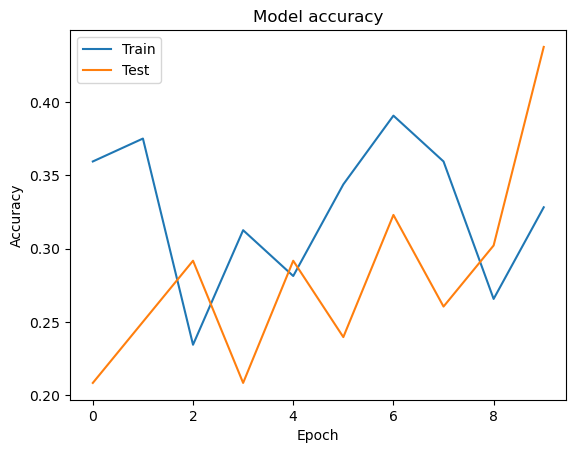

In [ ]:
import matplotlib.pyplot as plt

def graph():
    #Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

graph()

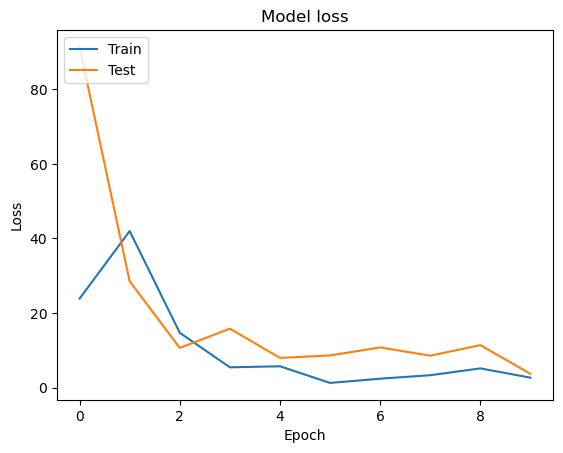

In [ ]:
import matplotlib.pyplot as plt

def graph():
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
graph()